# Sales depend on Advertise by TV Radio Newspaper  

In [4]:
# setup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error


In [5]:
# datasets 
tv_ad = pd.read_csv('./datatasest/advertising.csv')
tv_ad.head() # ตรวจสอบเบื้องต้น

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# Sale คู่กับ โฆษณา TV
df = tv_ad[ ['TV', 'Sales']]
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
# data preparation 
# 1. statistical summary 
df.describe() # ข้อมูลทางสถิติอะไรบ้าง


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [9]:
# data preparation 
# 2 .MissingValue 
df.isnull().sum() 

TV       0
Sales    0
dtype: int64

In [10]:
# Define x and y 
x = df ['TV']    # type of x is series
y = df['Sales'] # type of y is series 

x = df ['TV'].values.reshape(-1,1)    # values เอาแต่ค่าที่เป็นตัวเลข
y = df['Sales'].values.reshape(-1,1) 

In [11]:
type(x), type(y)
x.shape , y.shape

((200, 1), (200, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

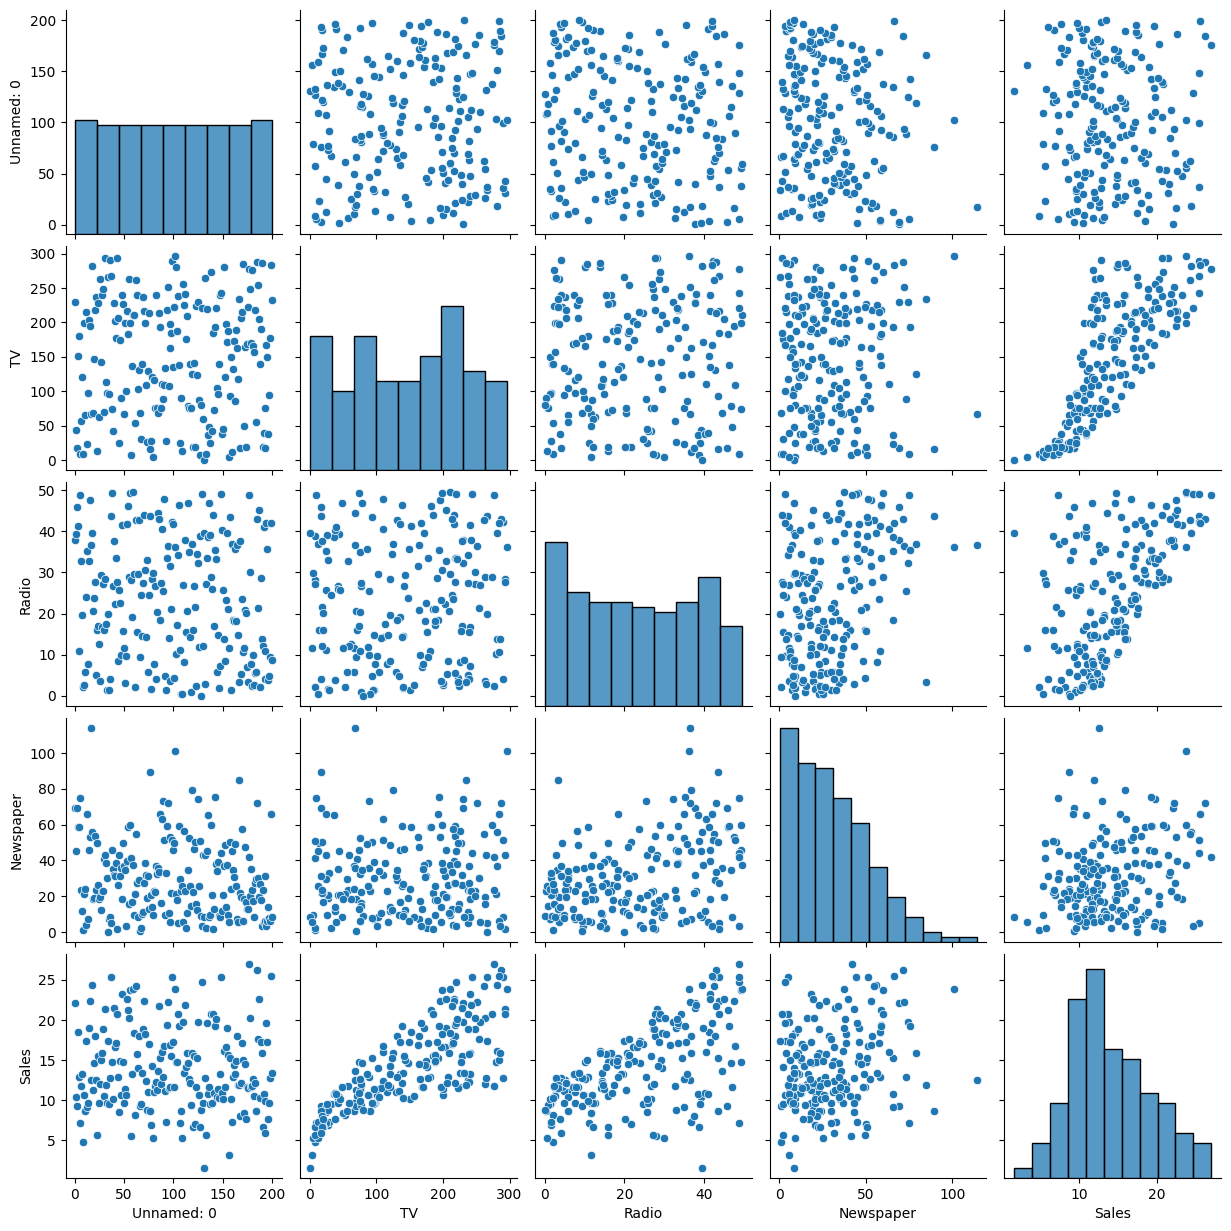

In [ ]:
# 
sns.pairplot( data = tv_ad )
plt.show

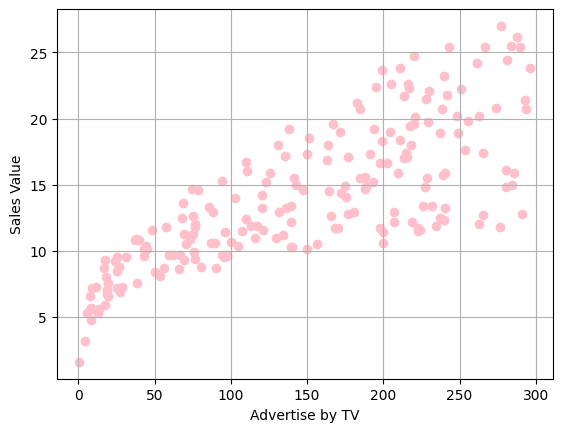

In [19]:
# data visualization with matplotlib (กราฟ)
plt.scatter(x, y, color = 'pink', marker = 'o')
plt.xlabel('Advertise by TV')
plt.ylabel('Sales Value')
plt.grid()
plt.show()

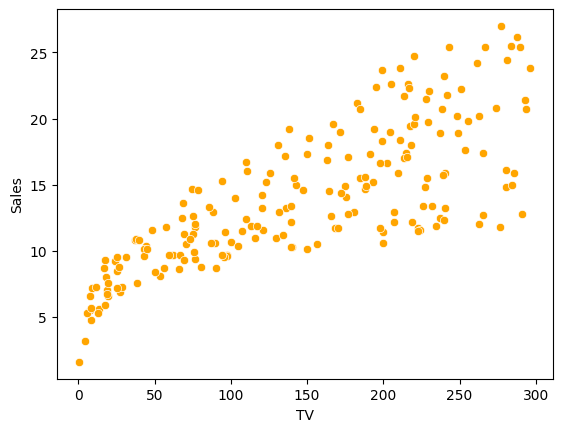

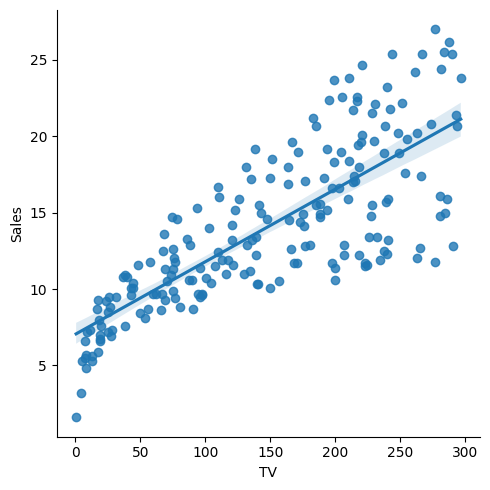

In [24]:
# data visualization with seaborn 
sns.scatterplot( x = df['TV'], y = df['Sales'] , color = 'orange' , data = df)  # scatterplot 
sns.lmplot( x= 'TV', y = 'Sales' , data = df)  # scatterplot with regression line  เพิ่มเส้นมาด้วย
plt.show()


In [27]:
# model training 
from sklearn.linear_model import LinearRegression
# Evaluation metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error #, r2_score

In [28]:
# train model 

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# y = a + bx 
a = model.intercept_
b = model.coef_
print(a, b)

[7.03259355] [[0.04753664]]


In [32]:
# r2-score 
r_square = model.score(x, y) 
y_prediction = model.predict(x) # หาค่า y ทำนาย เพื่อนำไปหาค่า error 
mse = mean_squared_error(y, y_prediction)
mae = mean_absolute_error(y, y_prediction)
rmse = np.sqrt(mse) 
# rmse = np.sqrt(mse)
rmse_2 = root_mean_squared_error(y,y_prediction)
print(f"MSE: {mse : .4f}")
print(f"MAE: {mae : .4f}")
print(f"RMSE 1: {rmse : .4f}")
print(f"RMSE_2: {rmse_2 : .4f}")


MSE:  10.5127
MAE:  2.5498
RMSE 1:  3.2423
RMSE_2:  3.2423


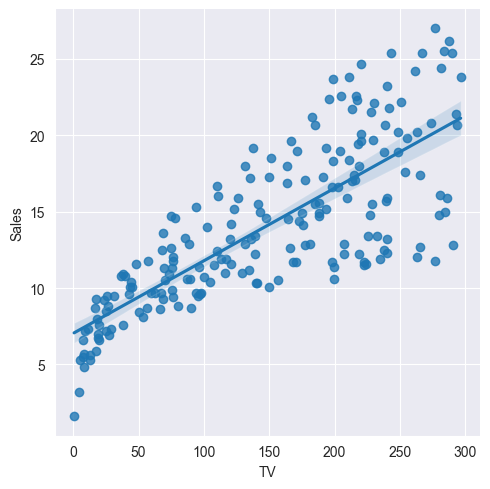

In [11]:
sns.set_style('darkgrid')   # white", "dark", "whitegrid", "darkgrid", "ticks"
sns.lmplot(x='TV', y='Sales', data=df)
plt.show()

In [ ]:
# x = 300 ,  500, 1000 
# x= [ 300, 500, 1000]  ==> x = np.array(x).reshape(-1,1) 
x_input = [[300], [500], [ 1000]]  # list of list 
y_pred= model.predict(x_input)
y_pred

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

##  แบบฝึกหัดข้อที่ 1 
**คำสั่ง:**
ให้สร้าง File ใหม่ ชื่อ linear_practice I
1. เตรียมข้อมูลให้เป็น `DataFrame`
2. สร้างแผนภาพการกระจาย `Scatterplot`
3. หาสัมประสิทธิ์สหสัมพันธ์ Corrleration: `.corr()`
4. สร้าง `linear Regression Moldel`
5. จงหาค่า y_pred เมื่อ ค่า x เป็นค่าเริ่มต้น 
6. จงหา `MAE, MSE, RMSE `
7. ทำนายค่า เมื่อเป็น 4.5 
8. ทำนายค่า เมื่อ x เป็น  1.5, 2.4, 3.6, 4.2, 5.8 ใยห้สร้างเป็น Array 

กำหนดข้อมูลเบื้องต้น

**เดือน** 
 `x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`  

**จำนวนสินค้าที่ขายได้ในแต่ละเดือน**
 `y=[25,35,40,42,51,60,62,72,78,90]`  

## แบบฝึกหัดที่ 2 
**คำสั่ง:**
ให้สร้าง File ใหม่ ชื่อ linear_practice 2
1. สร้างสมการถดถอยเชิงเส้น ของยอดขาย `Sales` จาก การโฆษณาผ่านทางหนังสือพิมพ์ `Newspaper`
2. สร้างสมการถดถอยเชิงเส้น ของยอดขาย `Sales` จาก การโฆษณาผ่านทางวิทยุ `Radio`